In [ ]:
# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1000
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

# Regression

In [ ]:
#Read data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Boston.csv'
                ,index_col=0)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

# Model building

In [4]:
x = df.iloc[:,:-1]
y = df['medv']

In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
#Evaluating regressor

In [6]:
xtest

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
308,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222,18.4,396.90,7.53
344,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370,17.6,396.90,7.18
48,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80
68,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345,18.9,396.21,8.10
363,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666,20.2,380.79,10.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.04203,28.0,15.04,0,0.464,6.442,53.6,3.6659,4,270,18.2,395.01,8.16
225,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,8,307,17.4,385.05,4.14
111,0.10793,0.0,8.56,0,0.520,6.195,54.4,2.7778,5,384,20.9,393.49,13.00
427,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666,20.2,24.65,15.69


In [7]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
ypred

array([30.176, 27.499, 19.706, 20.78 , 19.974, 19.557, 27.829, 19.102,
       19.865, 23.45 , 29.41 , 31.717, 20.604, 20.081, 20.169, 28.338,
       12.76 , 42.138, 24.049, 14.293, 19.611, 16.212, 24.367, 23.871,
       25.528,  9.393, 14.625, 19.832, 42.582, 12.451, 25.914, 19.952,
       48.419, 15.893, 22.905, 20.939, 15.525, 32.911, 13.307, 19.827,
       24.281, 23.319, 25.735, 15.814, 15.579, 11.747, 47.668, 11.536,
       21.374, 18.714, 24.039, 21.958, 24.533, 21.147, 10.445, 23.656,
       11.436, 23.175, 18.574, 43.353, 14.803, 26.948, 13.274, 14.59 ,
       18.028, 33.027, 42.67 , 24.901, 21.821, 20.356, 24.093,  6.945,
       18.539, 22.96 , 19.548, 20.498, 43.419, 23.996, 26.898, 33.217,
       17.448, 20.571, 34.074, 11.996, 24.311, 25.375, 15.014, 24.622,
       20.156, 17.131, 25.389, 45.43 , 16.224, 21.074, 15.141, 20.585,
       23.725, 23.101, 43.038, 20.897, 15.518, 14.773])

In [8]:
r2_score(ytest,ypred)

0.9201775410849965

In [9]:
print('R2 value :', r2_score(ytest, ypred))

R2 value : 0.9201775410849965


In [11]:
np.sqrt(mean_squared_error(ytest, ypred))
print(np.sqrt(8.635751784313731))

2.9386649663263302


In [12]:
print(f"R2 values: {r2_score(ytest,ypred)}")
print(f"MSE: {mean_squared_error(ytest,ypred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest,ypred))}")

R2 values: 0.9201775410849965
MSE: 7.888645235294117
RMSE: 2.8086732161812837


In [ ]:
#Visualize the rf

In [19]:
rf.estimators_    # gives no.of algorithms created in backend

[DecisionTreeRegressor(max_features=1.0, random_state=1779056042),
 DecisionTreeRegressor(max_features=1.0, random_state=86023532),
 DecisionTreeRegressor(max_features=1.0, random_state=387831623),
 DecisionTreeRegressor(max_features=1.0, random_state=2083365918),
 DecisionTreeRegressor(max_features=1.0, random_state=1471417320),
 DecisionTreeRegressor(max_features=1.0, random_state=1662839822),
 DecisionTreeRegressor(max_features=1.0, random_state=1199210517),
 DecisionTreeRegressor(max_features=1.0, random_state=939776958),
 DecisionTreeRegressor(max_features=1.0, random_state=2129347771),
 DecisionTreeRegressor(max_features=1.0, random_state=1884635536),
 DecisionTreeRegressor(max_features=1.0, random_state=1732446252),
 DecisionTreeRegressor(max_features=1.0, random_state=956366625),
 DecisionTreeRegressor(max_features=1.0, random_state=1318959122),
 DecisionTreeRegressor(max_features=1.0, random_state=383641957),
 DecisionTreeRegressor(max_features=1.0, random_state=102184658),
 D

In [20]:
len(rf.estimators_)

100

In [14]:
rf.estimators_[99]

DecisionTreeRegressor(max_features=1.0, random_state=2115828262)

In [15]:
x.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

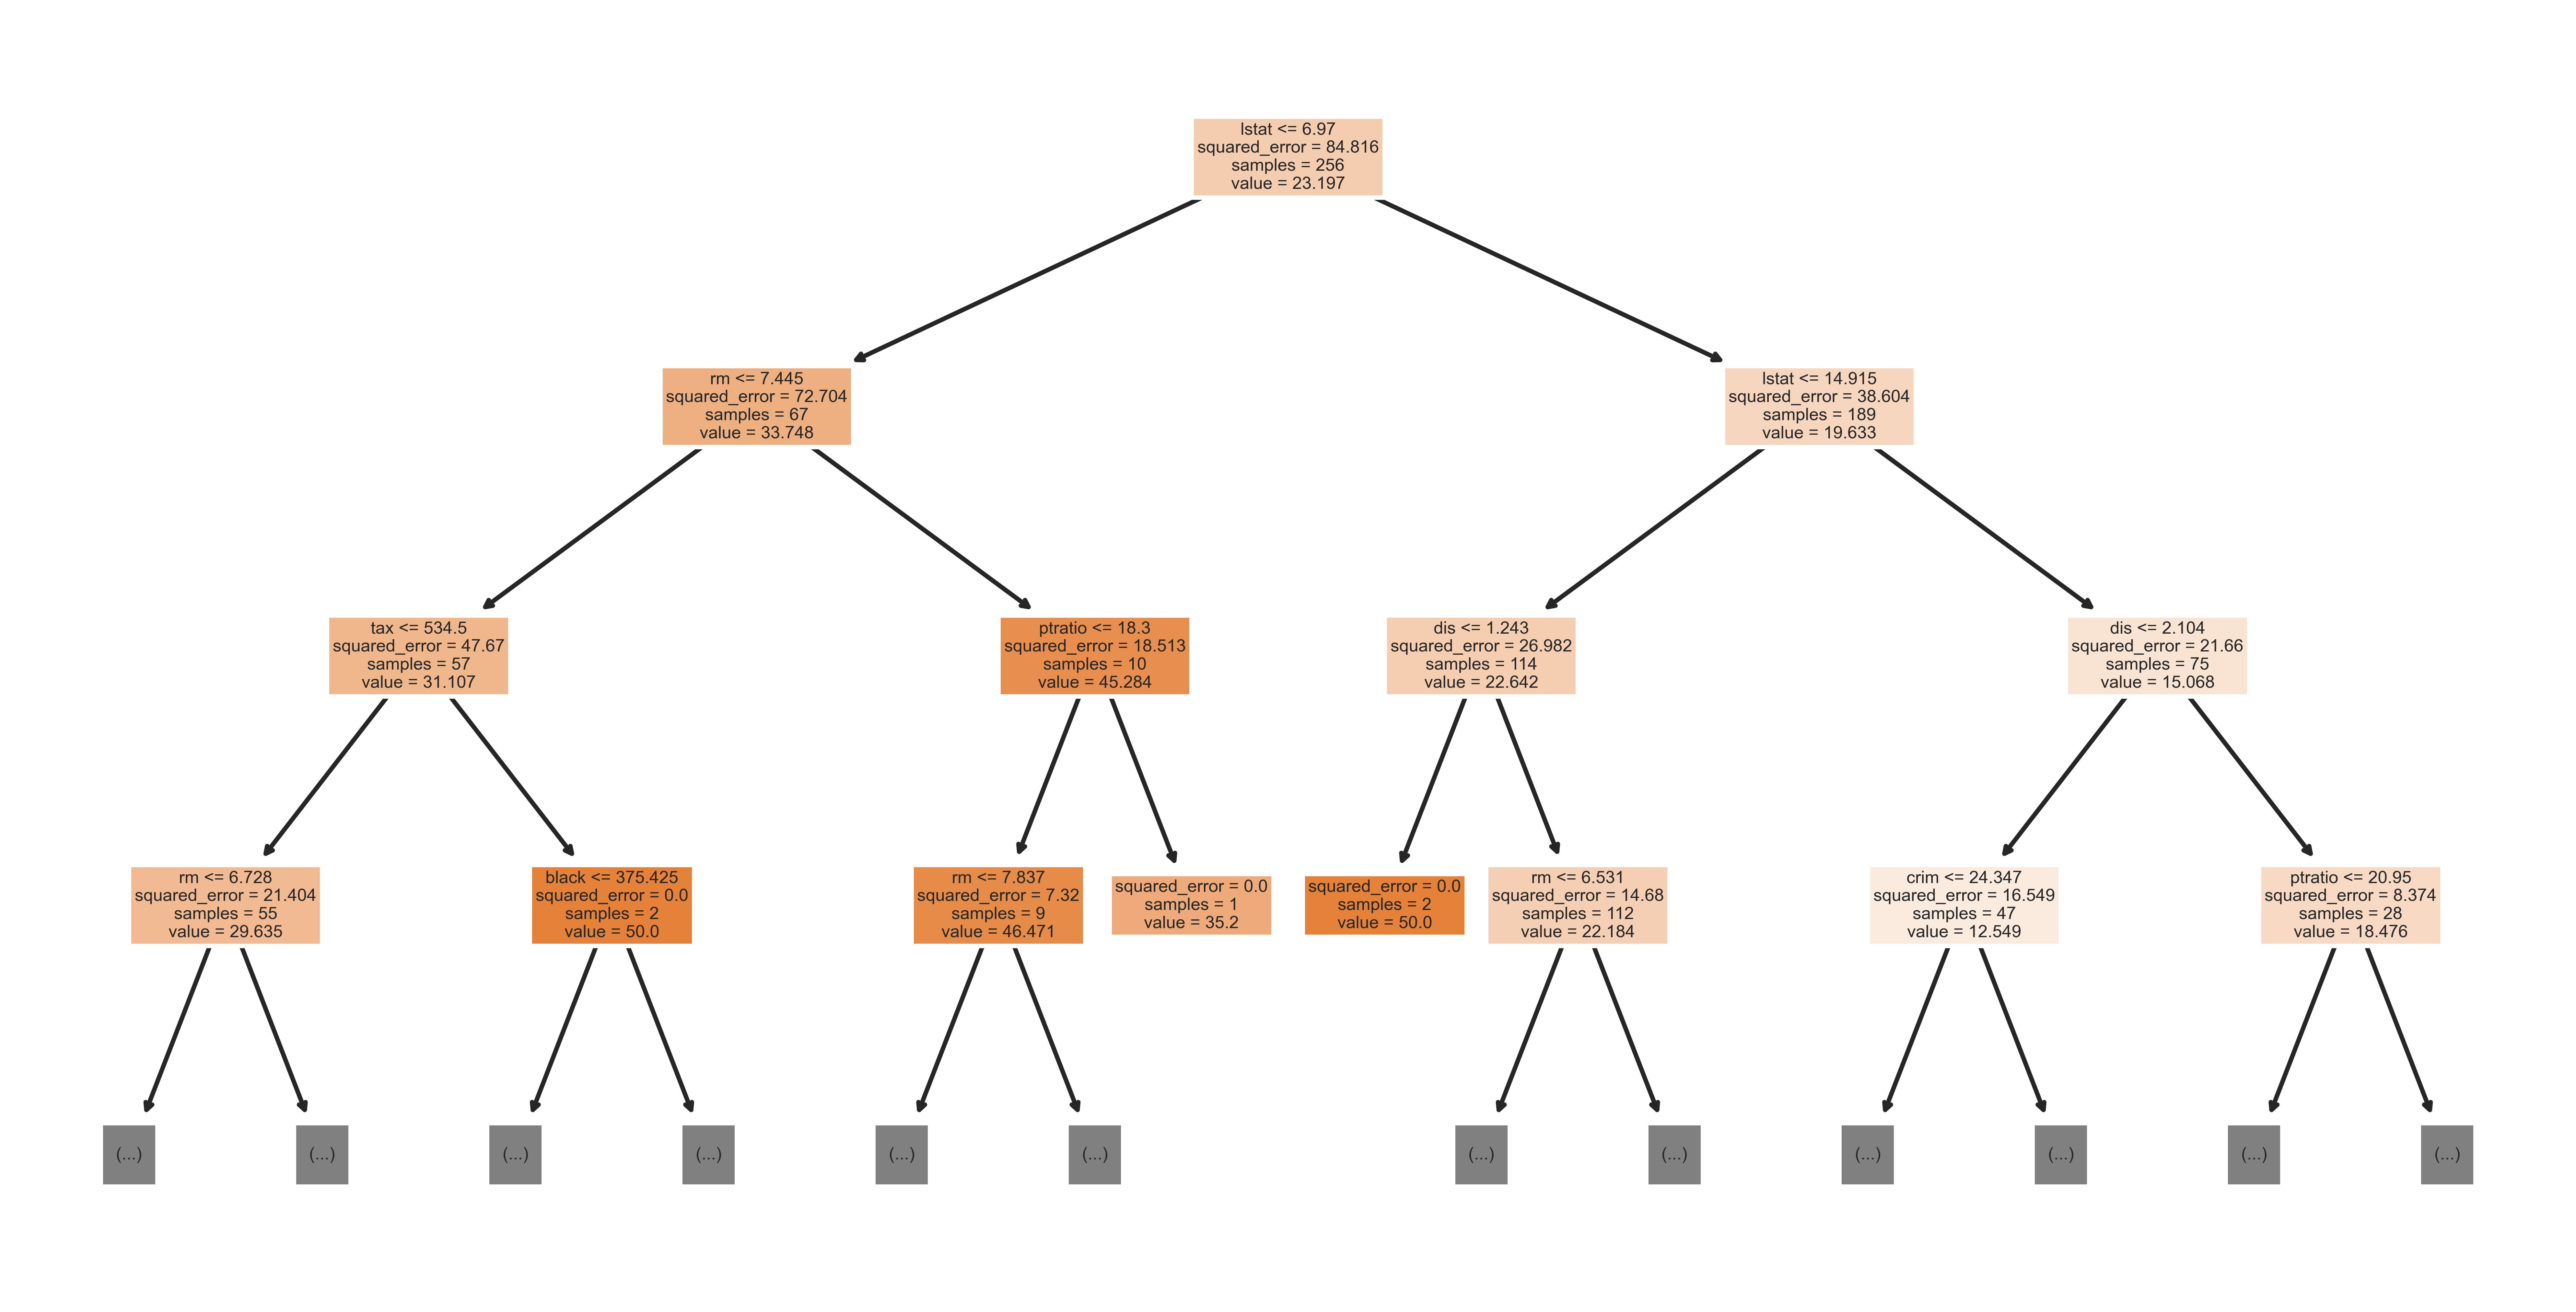

In [18]:
tree.plot_tree(rf.estimators_[0], feature_names= list(x.columns),
              filled=True, max_depth=3)
plt.show()

# Classification

In [ ]:
#Read the dataset

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Mobile_price_range.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [20]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [21]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: xlabel='price_range', ylabel='count'>

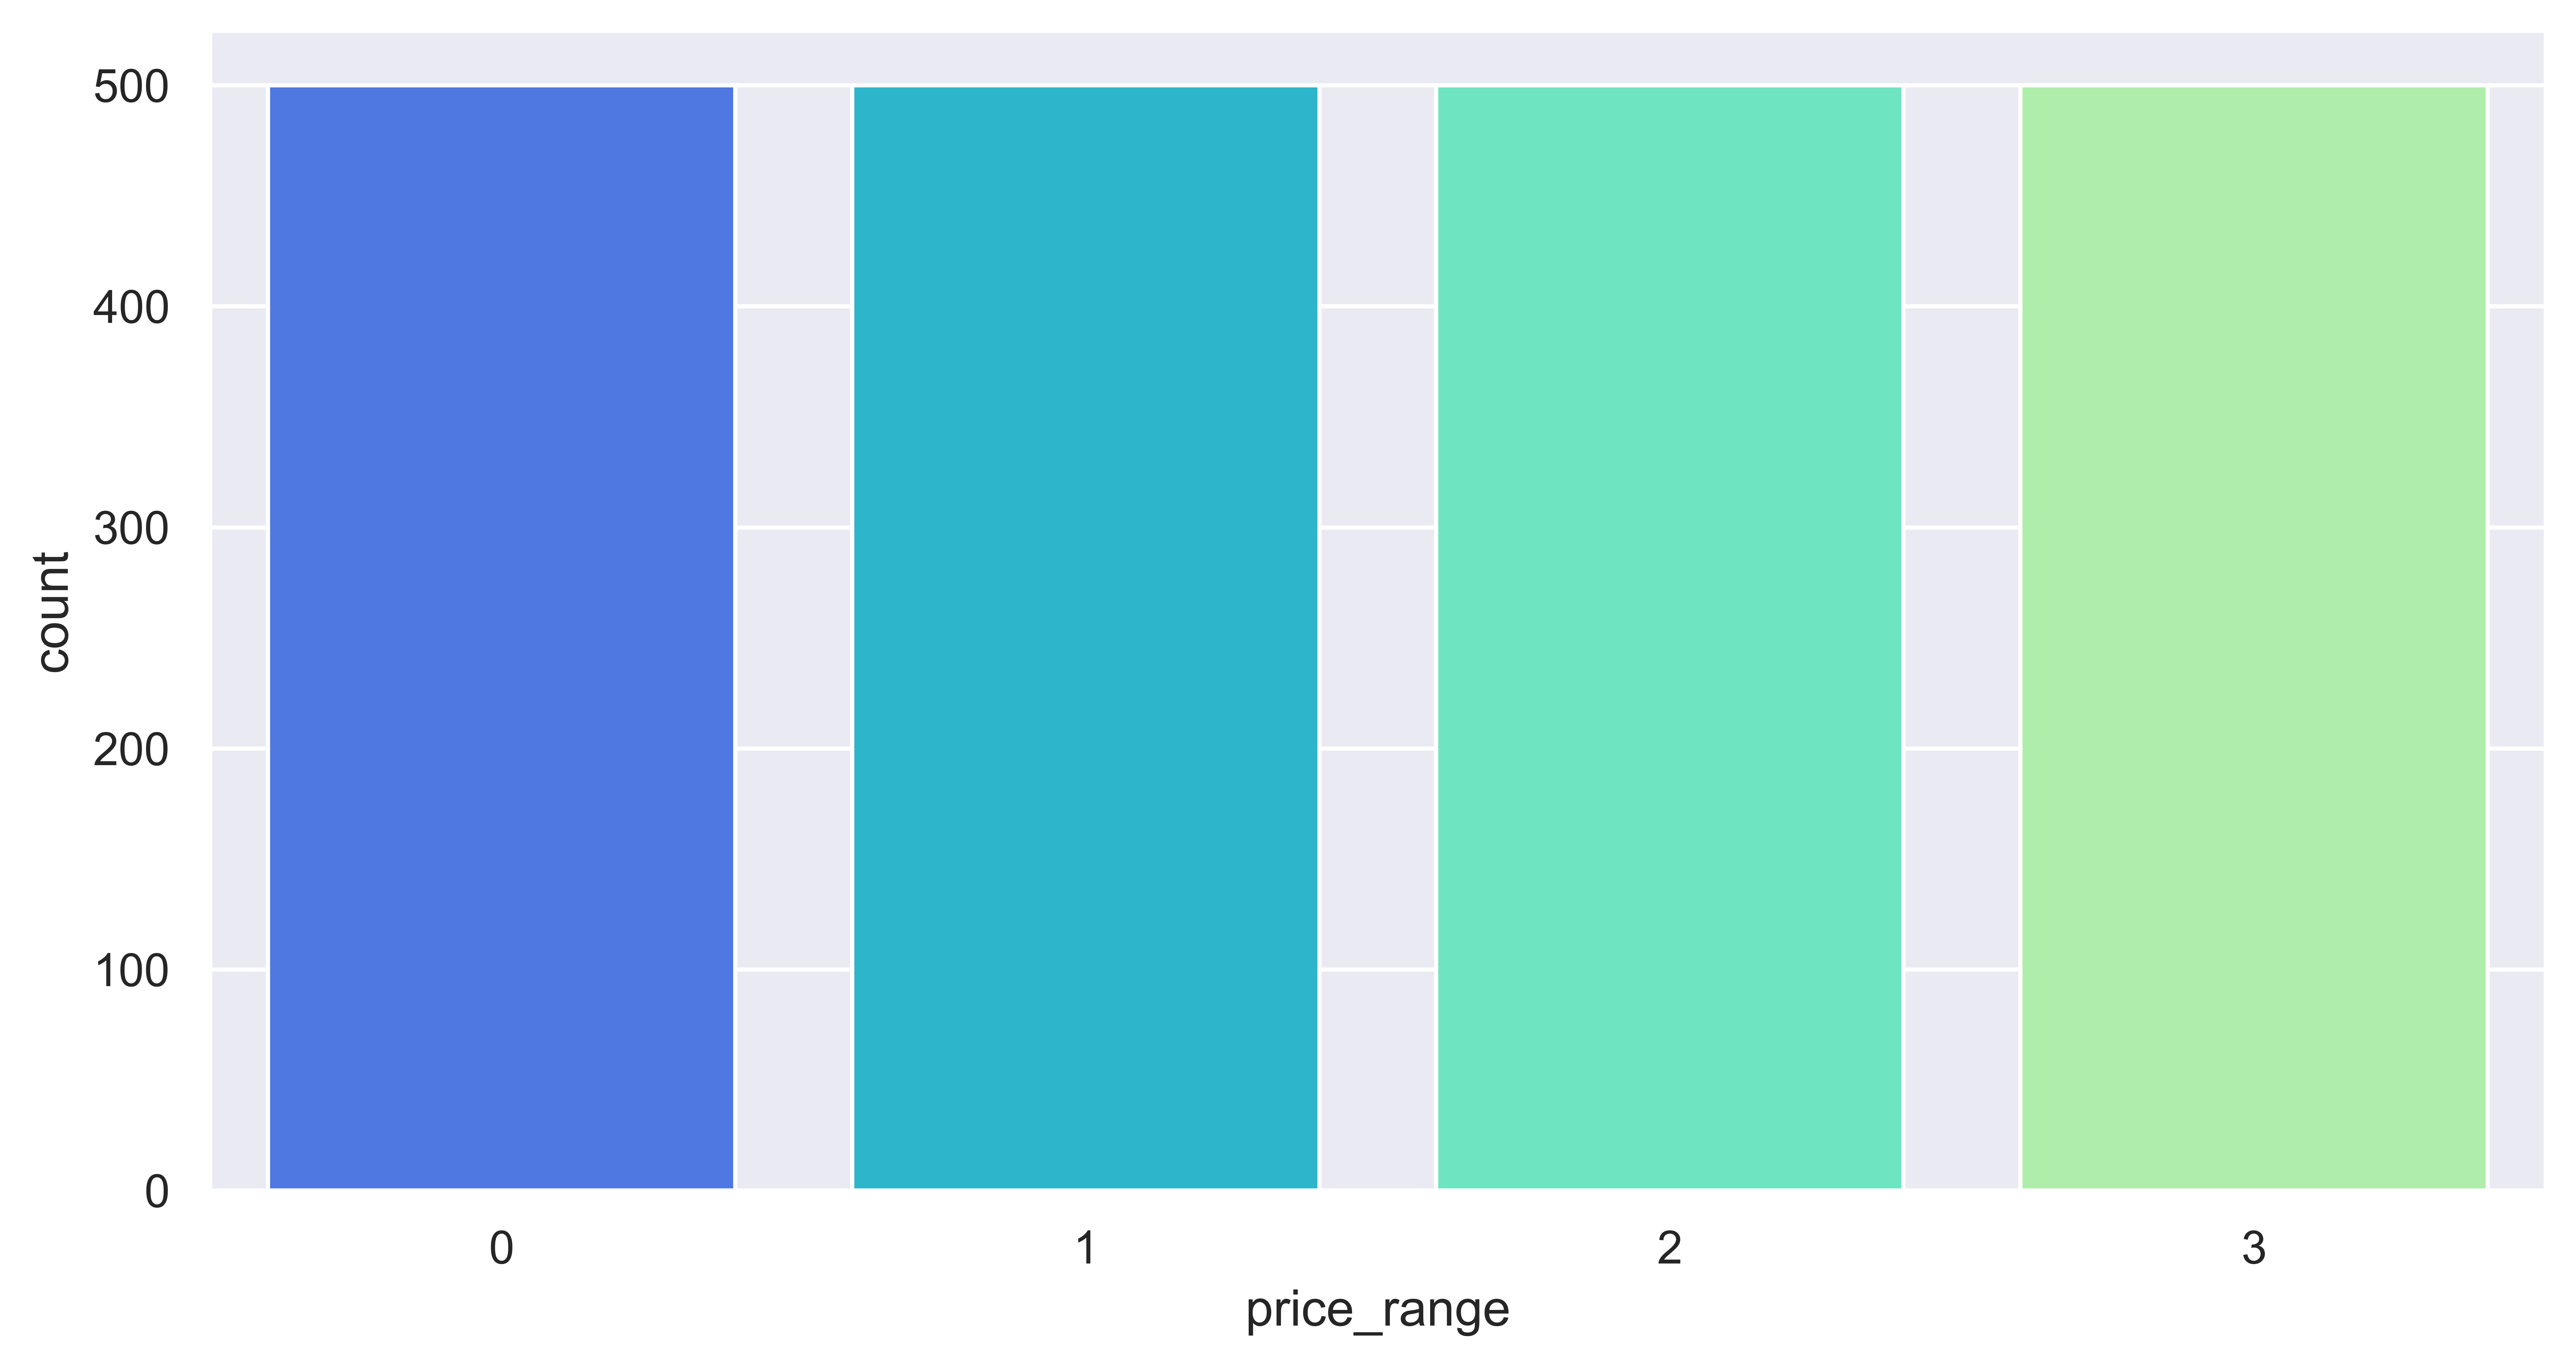

In [30]:
sns.countplot(x = df['price_range'])

In [27]:
df['price_range'].replace([0,1,2,3],['low','medium','high','very high'], inplace=True)

In [28]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,medium
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,high
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,high
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,high
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,low
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,high
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,very high
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,low


In [29]:
#Evaluate model

In [30]:
x = df.iloc[:,:-1]
y = df['price_range']

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [32]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)

In [33]:
xtest

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
674,1034,0,2.6,1,2,1,45,0.3,190,3,4,182,1293,969,15,1,7,1,0,0
1699,1002,1,1.8,0,1,0,45,0.7,180,7,7,948,1007,1234,19,13,18,1,1,0
1282,609,1,0.5,0,4,1,10,0.1,81,6,6,113,1524,1905,16,3,18,1,1,1
1315,1510,0,0.6,1,1,0,32,0.7,135,3,8,963,1520,854,8,2,10,1,0,1
1210,805,1,1.7,1,0,1,58,0.9,168,3,10,81,1544,3397,7,6,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1266,0,1.9,1,0,1,7,0.2,184,3,12,346,1468,2532,10,5,4,1,1,1
763,1741,1,1.8,0,0,0,14,0.7,143,8,0,730,1895,3387,11,3,3,1,0,0
385,1880,1,1.8,0,4,1,18,0.7,138,3,5,71,699,3333,17,15,7,1,0,0
1667,1967,0,0.5,0,0,1,46,0.6,199,1,7,518,1374,1567,15,2,7,1,1,0


In [34]:
yp

array(['low', 'low', 'medium', 'low', 'very high', 'medium', 'low',
       'high', 'high', 'very high', 'low', 'very high', 'medium', 'low',
       'very high', 'medium', 'low', 'medium', 'medium', 'high',
       'very high', 'very high', 'low', 'high', 'very high', 'high',
       'high', 'very high', 'high', 'high', 'high', 'medium', 'high',
       'low', 'very high', 'very high', 'low', 'low', 'medium', 'low',
       'medium', 'low', 'high', 'medium', 'low', 'medium', 'high', 'high',
       'medium', 'high', 'high', 'very high', 'medium', 'very high',
       'high', 'very high', 'medium', 'very high', 'very high', 'medium',
       'low', 'high', 'medium', 'very high', 'high', 'medium', 'low',
       'high', 'very high', 'high', 'medium', 'high', 'low', 'very high',
       'very high', 'medium', 'high', 'medium', 'low', 'low', 'low',
       'very high', 'medium', 'high', 'very high', 'high', 'high', 'low',
       'high', 'medium', 'very high', 'low', 'medium', 'medium', 'high',
      

In [35]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

        high       0.77      0.84      0.80       106
         low       0.89      0.90      0.90        92
      medium       0.77      0.80      0.79        96
   very high       0.97      0.83      0.89       106

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



In [36]:
len(rfc.estimators_)

100

In [37]:
rfc.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=509272592),
 DecisionTreeClassifier(max_features='sqrt', random_state=812017026),
 DecisionTreeClassifier(max_features='sqrt', random_state=1756043825),
 DecisionTreeClassifier(max_features='sqrt', random_state=1411167111),
 DecisionTreeClassifier(max_features='sqrt', random_state=1610284956),
 DecisionTreeClassifier(max_features='sqrt', random_state=412099971),
 DecisionTreeClassifier(max_features='sqrt', random_state=2070258810),
 DecisionTreeClassifier(max_features='sqrt', random_state=728873797),
 DecisionTreeClassifier(max_features='sqrt', random_state=446109712),
 DecisionTreeClassifier(max_features='sqrt', random_state=55709540),
 DecisionTreeClassifier(max_features='sqrt', random_state=1848615506),
 DecisionTreeClassifier(max_features='sqrt', random_state=1395325210),
 DecisionTreeClassifier(max_features='sqrt', random_state=8867619),
 DecisionTreeClassifier(max_features='sqrt', random_state=485632984),
 DecisionTreeClas

In [38]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
#tree.plot_tree(rfc.estimators_[0], feature_names=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
#       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
#       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
#       'touch_screen', 'wifi'],max_depth=3)
#plt.show()   # written in another way

In [40]:
list(df['price_range'].unique())

['medium', 'high', 'very high', 'low']

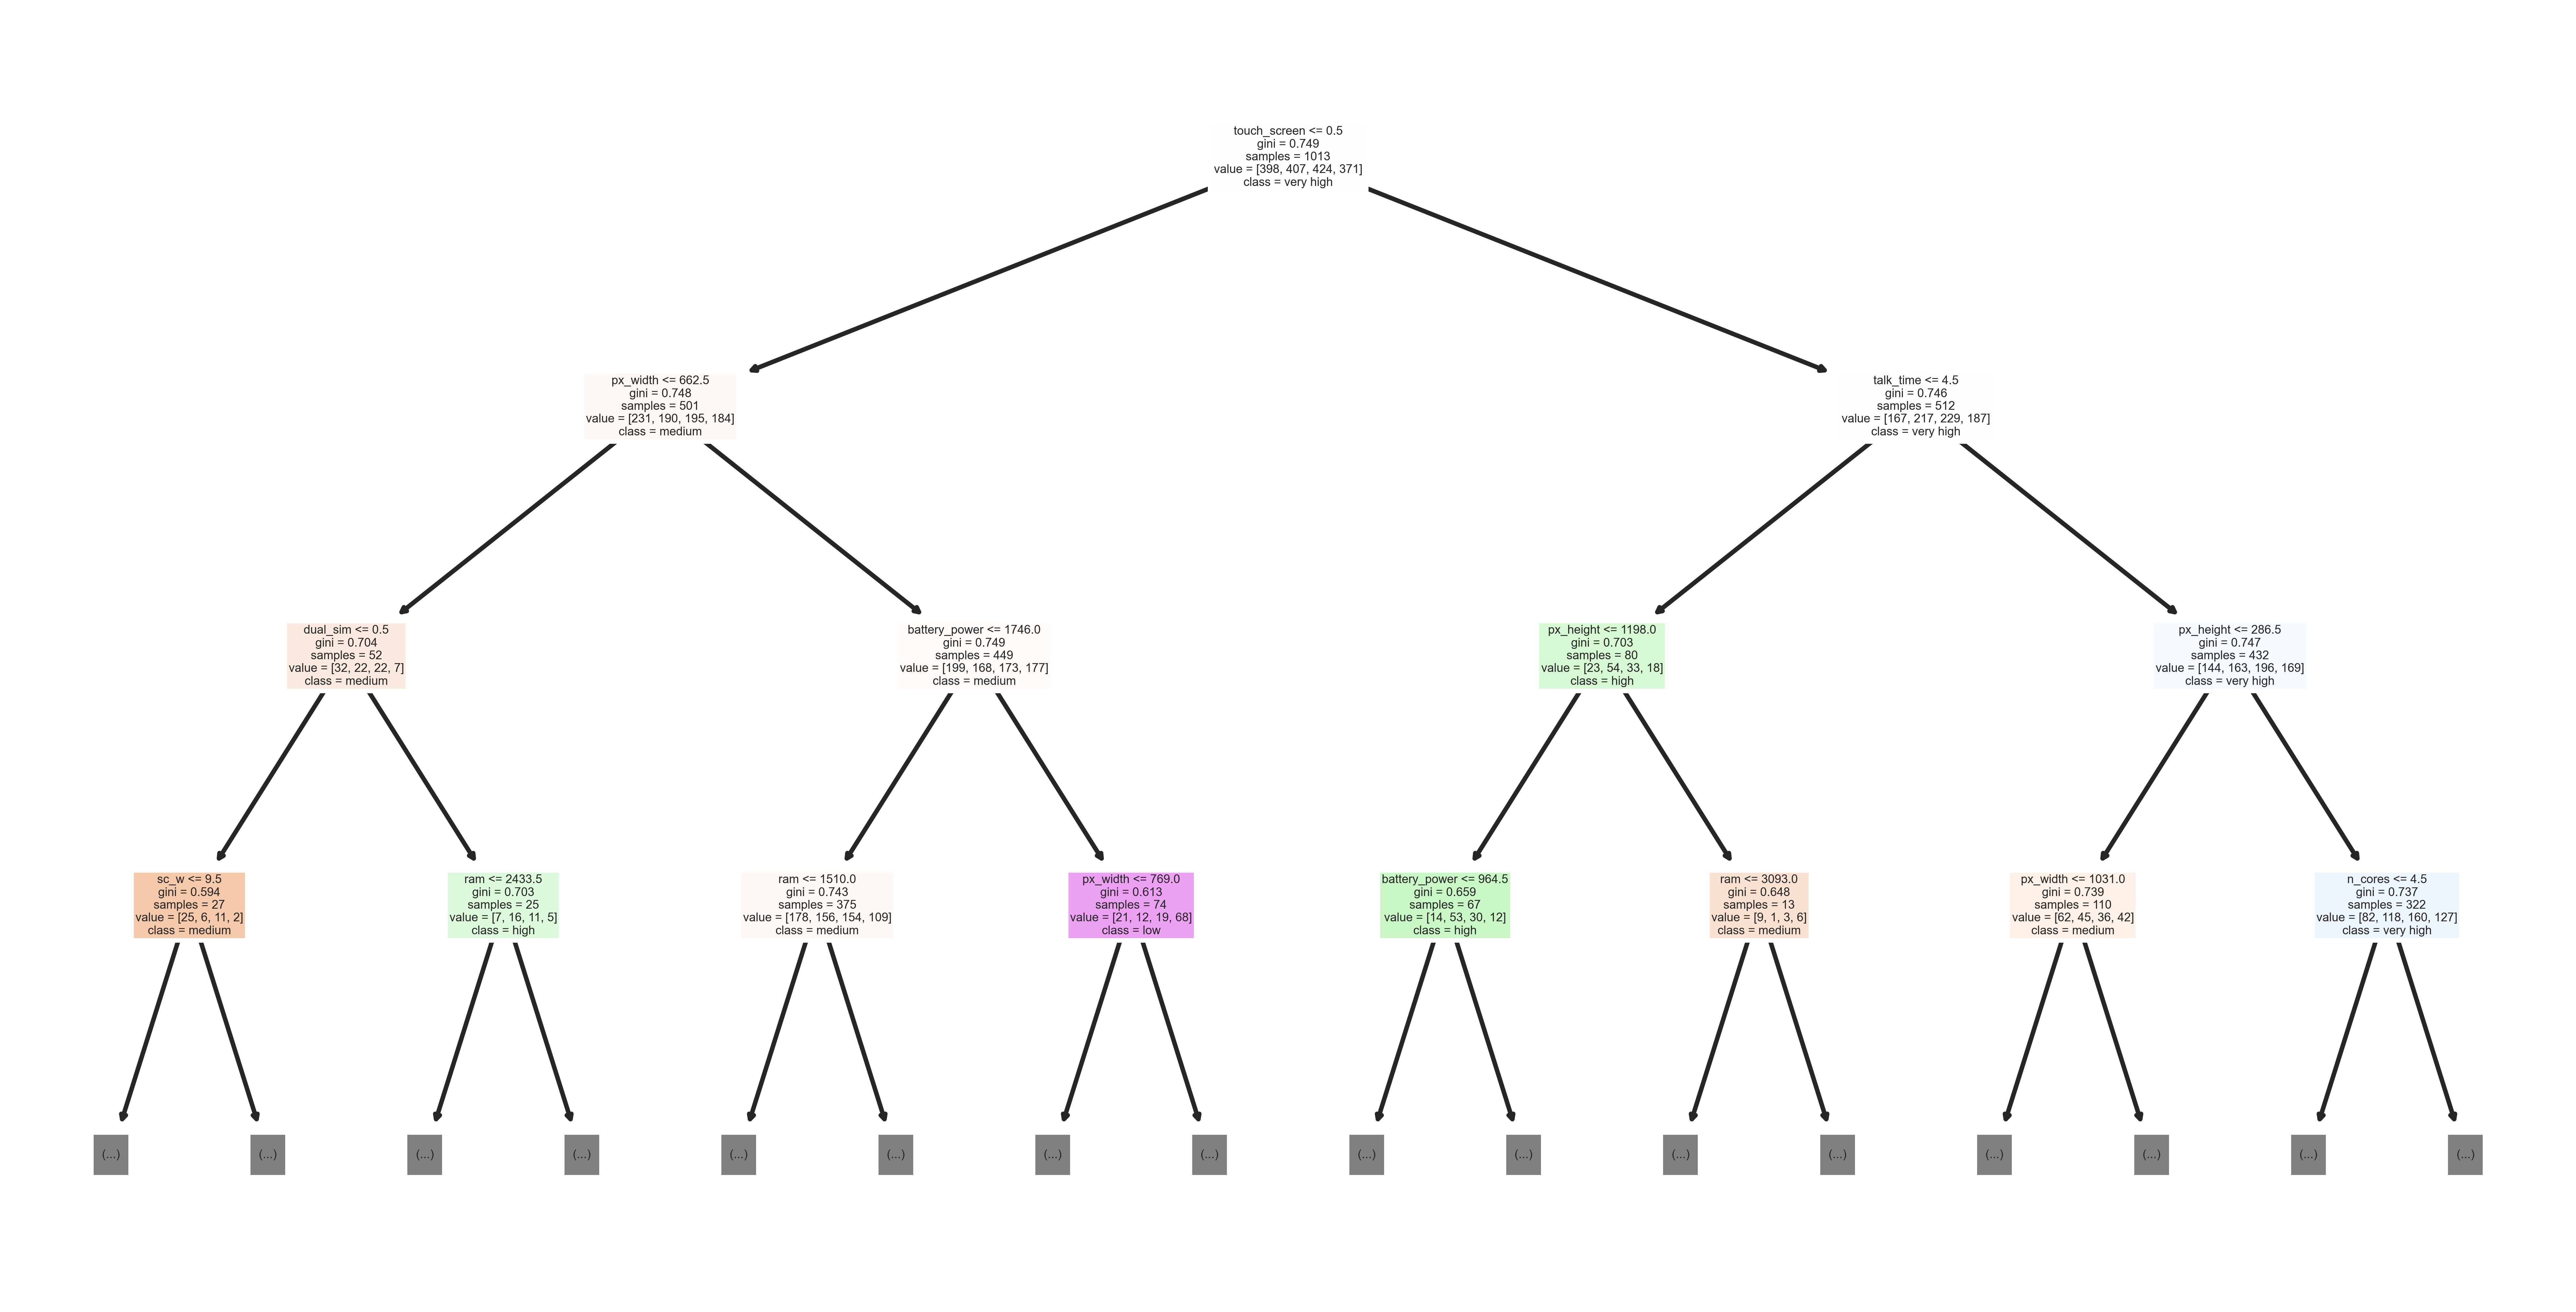

In [41]:
tree.plot_tree(rfc.estimators_[0], feature_names=list(x.columns),
               class_names= list(df['price_range'].unique()),
               filled=True , max_depth=3)
plt.show()

In [ ]:
#Try to visualize first 5 decision trees.ss